In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_csv(r'../dataset/source/StudentsPerformance.csv')

In [182]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [183]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [184]:
df.columns = (
    df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('/', '_')
)
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [186]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [187]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [188]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


***
### Exploratory Data Analysis (EDA)


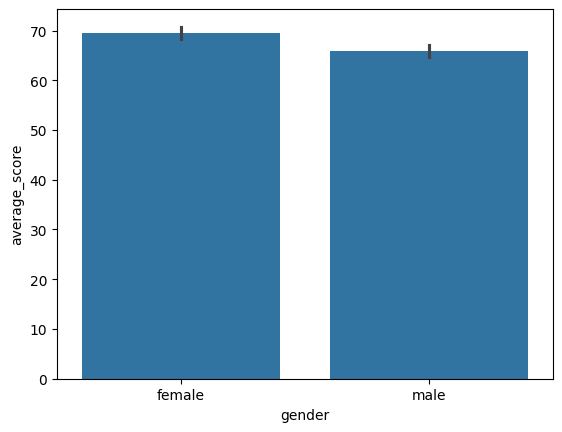

In [194]:
# Average scores by gender
sns.barplot(x='gender', y='average_score', data=df)
plt.show()

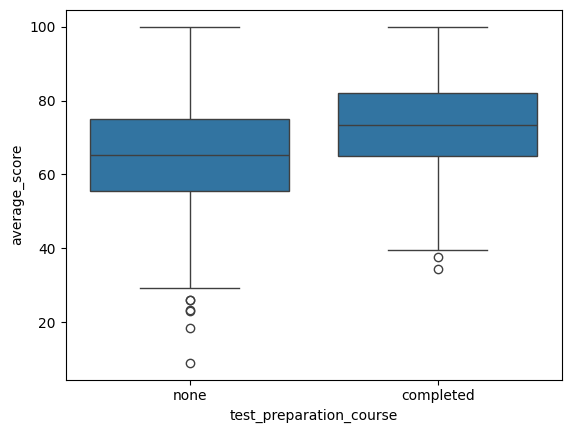

In [195]:
# Test preparation impact
sns.boxplot(x='test_preparation_course', y='average_score', data=df)
plt.show()

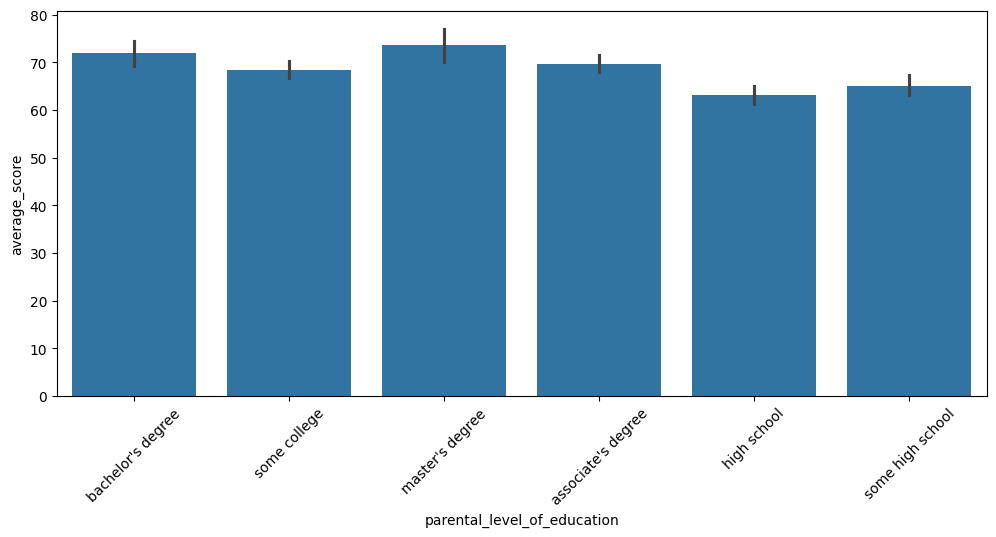

In [196]:
# Parental education vs performance
plt.figure(figsize=(12,5))
sns.barplot(x='parental_level_of_education', y='average_score', data=df)
plt.xticks(rotation=45)
plt.show()

***
### Correlation Analysis


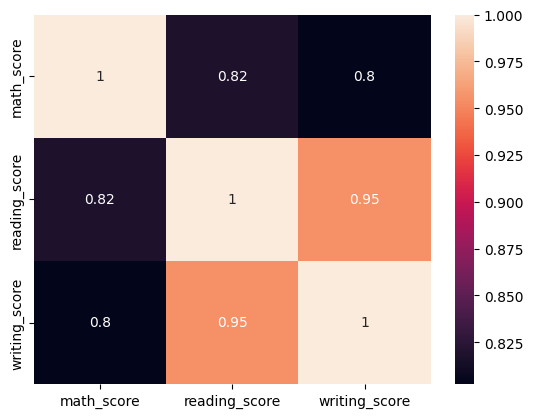

In [197]:
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True)
plt.show()


**Key Insights (Example Findings):**

Students who completed test preparation courses scored 10–15% higher on average.

Higher parental education levels correlate with better academic performance.

Math and writing scores show strong positive correlation (r ≈ 0.8).

In [193]:
# df.to_csv(r'../dataset/cleaned_dataset/StudentsPerformance_processed.csv', index=False)